In [1]:
# Data Analyis on Customers defaulted on loans

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from pandas_profiling import ProfileReport

In [3]:
##import/integrate data set in a varaible

In [4]:
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [5]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


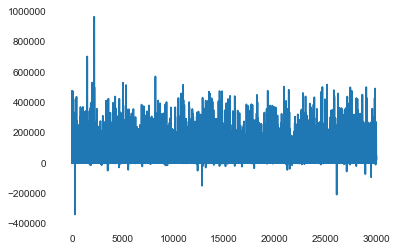

In [7]:
plt.plot(credit['BILL_AMT6'])
plt.show()

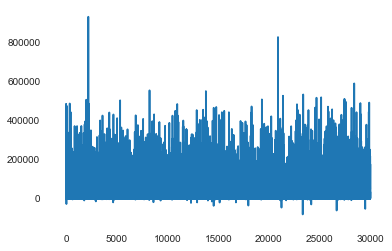

In [8]:
plt.plot(credit['BILL_AMT5'])
plt.show()

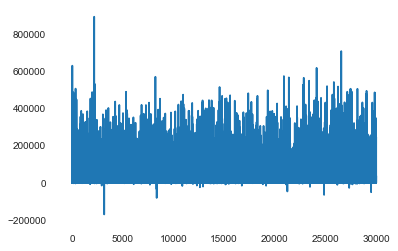

In [9]:
plt.plot(credit['BILL_AMT4'])
plt.show()

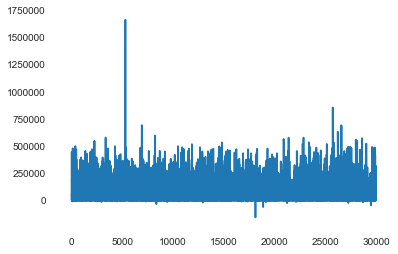

In [10]:
plt.plot(credit['BILL_AMT3'])
plt.show()

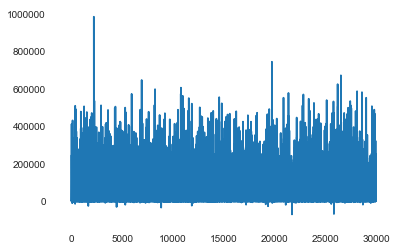

In [11]:
plt.plot(credit['BILL_AMT2'])
plt.show()

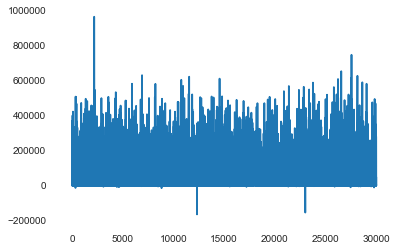

In [12]:
plt.plot(credit['BILL_AMT1'])
plt.show()

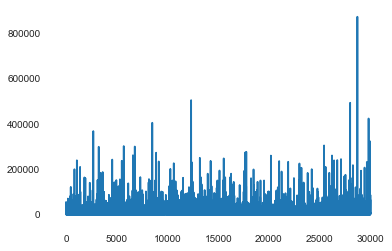

In [13]:
plt.plot(credit['PAY_AMT1'])
plt.show()

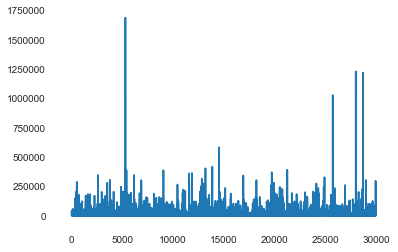

In [14]:
plt.plot(credit['PAY_AMT2'])
plt.show()

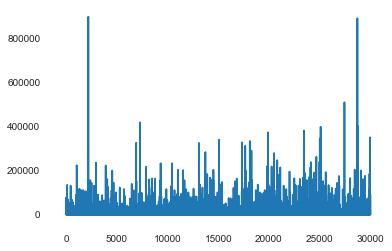

In [15]:
plt.plot(credit['PAY_AMT3'])
plt.show()

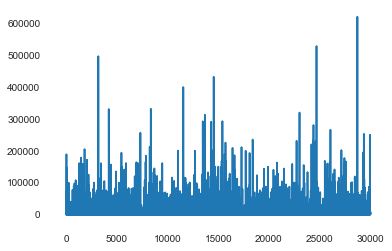

In [16]:
plt.plot(credit['PAY_AMT4'])
plt.show()

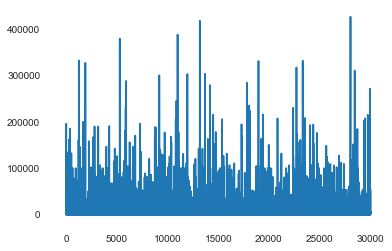

In [17]:
plt.plot(credit['PAY_AMT5'])
plt.show()

/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/skommuri/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


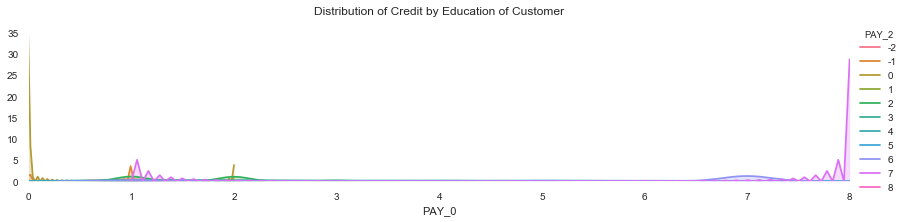

In [18]:
fig = sns.FacetGrid(credit, hue='PAY_2', aspect =4)
fig.map(sns.kdeplot, 'PAY_0', shade=True)
top = credit['PAY_0'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Credit by Education of Customer')
fig.add_legend()

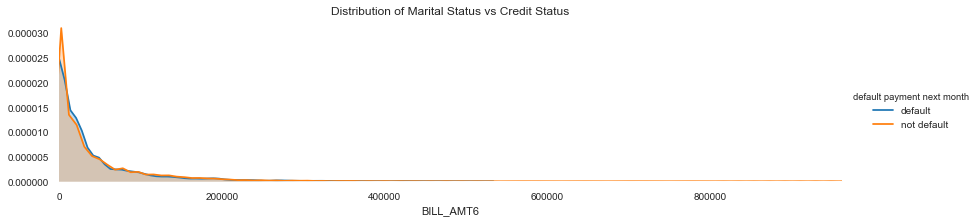

In [19]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'BILL_AMT6', shade=True)
top = credit['BILL_AMT6'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

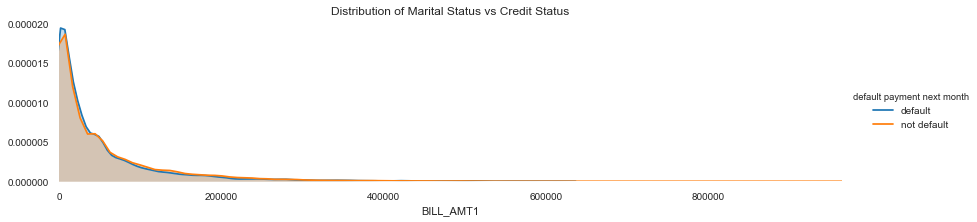

In [20]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'BILL_AMT1', shade=True)
top = credit['BILL_AMT1'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

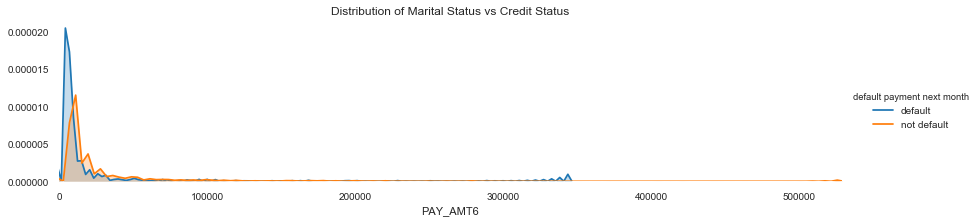

In [21]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'PAY_AMT6', shade=True)
top = credit['PAY_AMT6'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

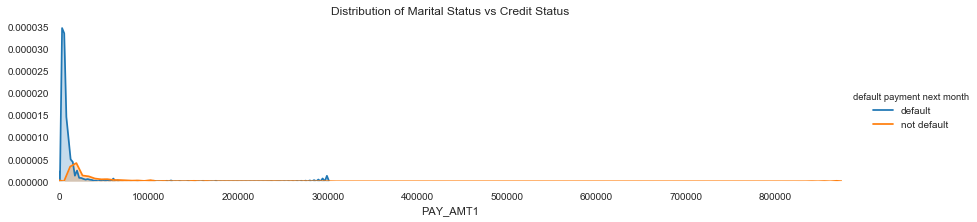

In [22]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect =4)
fig.map(sns.kdeplot, 'PAY_AMT1', shade=True)
top = credit['PAY_AMT1'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Marital Status vs Credit Status')
fig.add_legend()

In [23]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [24]:
credit.rename(columns = {'default payment next month':'target'}, inplace = True)

In [25]:
#DataFrame has 30,000 rows, & 25 columns)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
target       30000 non-null object
dtypes: int64(22), object(3)
memory us

In [26]:
#DataFrame is two Dimentional
credit.ndim

2

In [27]:
#One-Hot Encoding Pandas* Approach 1
credit1 = pd.get_dummies(credit)

In [28]:
#Checking the DataTypes 
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
ID                           30000 non-null int64
LIMIT_BAL                    30000 non-null int64
MARRIAGE                     30000 non-null int64
AGE                          30000 non-null int64
PAY_0                        30000 non-null int64
PAY_2                        30000 non-null int64
PAY_3                        30000 non-null int64
PAY_4                        30000 non-null int64
PAY_5                        30000 non-null int64
PAY_6                        30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-null int64
PAY_AMT2                     30000 non-nu

# Data Clean-up, Remove the outliers

In [29]:
#I found there are outlier for AGE > 60, so limit the column AGE to 60 years old.
credit1 = credit1.loc[(credit1['AGE'] <= 60)]

In [30]:
#I found there are outlier, limitng the columns values for Marriage & Credit Limit.
credit1 = credit1.loc[(credit1['MARRIAGE'] >= 1) & (credit1['MARRIAGE'] <= 2)]

In [31]:
credit1 = credit1.loc[(credit1['LIMIT_BAL'] >= 20000) & (credit1['LIMIT_BAL'] <= 300000)]

In [32]:
#I found there are outlier, limitng the columns values for Payment to <2.
#credit1 = credit1.loc[(credit1['PAY_0'] <= 2) & (credit1['PAY_2'] <= 2) & (credit1['PAY_3'] <= 2) & (credit1['PAY_4'] <= 2) & (credit1['PAY_5'] <= 2) & (credit1['PAY_6'] <= 2)]
credit1 = credit1.loc[(credit1['PAY_5'] <= 2) & (credit1['PAY_6'] <= 2)]

In [33]:
header = credit1.dtypes.index

In [34]:
columns_drop = ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
credit1 = credit1.drop(columns_drop, axis=1)

In [35]:
columns_drop = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
credit1 = credit1.drop(columns_drop, axis=1)

In [36]:
columns_drop = ['PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
credit1 = credit1.drop(columns_drop, axis=1)

In [37]:
credit1 = credit1.drop(['ID'], axis=1)

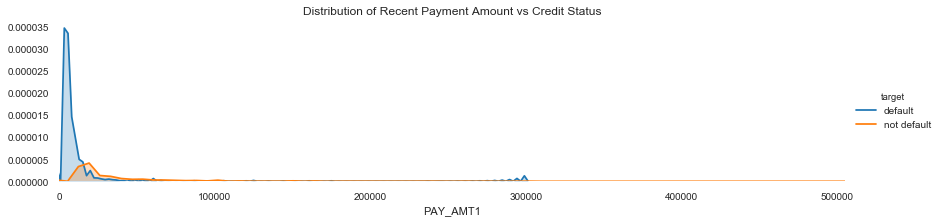

In [43]:
fig = sns.FacetGrid(credit, hue='target', aspect =4)
fig.map(sns.kdeplot, 'PAY_AMT1', shade=True)
top = credit1['PAY_AMT1'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of Recent Payment Amount vs Credit Status')
fig.add_legend()

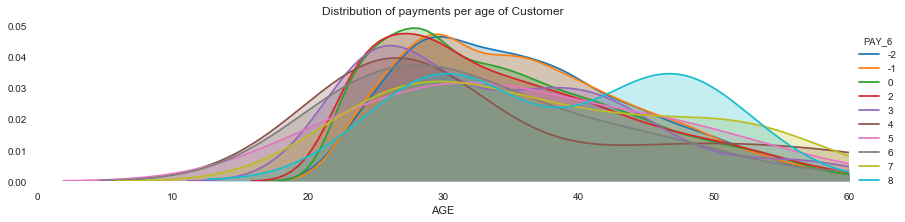

In [44]:
fig = sns.FacetGrid(credit, hue='PAY_6', aspect =4)
fig.map(sns.kdeplot, 'AGE', shade=True)
top = credit1['AGE'].max()
fig.set(xlim=(0,top))
fig.set(title='Distribution of payments per age of Customer')
fig.add_legend()

In [45]:
credit1.profile_report()

In [46]:
corrMat = credit1.corr()
print(corrMat)

                           LIMIT_BAL  MARRIAGE       AGE     PAY_0  BILL_AMT1  \
LIMIT_BAL                   1.000000 -0.079267  0.107545 -0.258232   0.257047   
MARRIAGE                   -0.079267  1.000000 -0.463760  0.000750  -0.021961   
AGE                         0.107545 -0.463760  1.000000 -0.029501   0.042108   
PAY_0                      -0.258232  0.000750 -0.029501  1.000000   0.216455   
BILL_AMT1                   0.257047 -0.021961  0.042108  0.216455   1.000000   
PAY_AMT1                    0.146094  0.001523  0.010052 -0.065703   0.109127   
SEX_female                  0.075246 -0.049351 -0.086466 -0.060575  -0.035565   
SEX_male                   -0.075246  0.049351  0.086466  0.060575   0.035565   
EDUCATION_graduate school   0.223330  0.189101 -0.129219 -0.125676  -0.055088   
EDUCATION_high school      -0.133248 -0.135649  0.239234  0.053741  -0.002619   
EDUCATION_other             0.035194 -0.011226  0.009829 -0.029590   0.039497   
EDUCATION_university       -

In [53]:
#Credit Limit Group by Payment
credit1.groupby(['target_default', 'LIMIT_BAL'])['target_default'].count()

target_default  LIMIT_BAL
0               20000        1201
                30000         992
                40000         130
                50000        2386
                60000         565
                70000         498
                80000        1167
                90000         470
                100000        759
                110000        442
                120000        532
                130000        566
                140000        568
                150000        902
                160000        546
                170000        446
                180000        804
                190000        176
                200000       1227
                210000        606
                220000        376
                230000        617
                240000        498
                250000        292
                260000        425
                270000        205
                280000        415
                290000        293
                300000

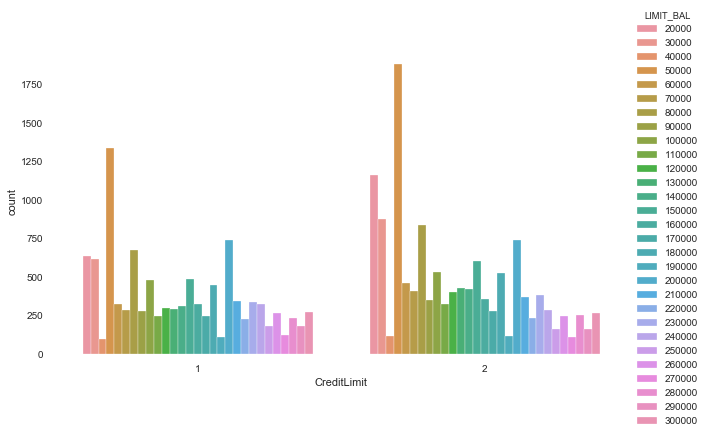

In [58]:
# Credit Limit Group by Pay Amount
g = sns.catplot('MARRIAGE', data=credit1, hue='LIMIT_BAL', kind='count', aspect=1.75)
g.set_xlabels('CreditLimit')

In [77]:
# Number of customer default class grouped by Education.
credit1.pivot_table('LIMIT_BAL', 'AGE', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,1,2,All
AGE,,,
21,230000,1180000,1410000
22,2090000,17980000,20070000
23,4840000,48710000,53550000
24,8780000,70010000,78790000
25,13750000,88550000,102300000
26,16650000,114110000,130760000
27,24770000,134640000,159410000
28,31500000,133740000,165240000
29,36020000,150420000,186440000


In [78]:
table = pd.crosstab(index=[credit.target,credit.MARRIAGE], columns=[credit.target,credit.SEX])

In [79]:
table.unstack()

target      default                                      not default        \
SEX          female                 male                      female         
MARRIAGE          0     1     2   3    0     1     2   3           0     1   
target                                                                       
default           3  1860  1856  44    2  1346  1485  40           0     0   
not default       0     0     0   0    0     0     0   0          37  6609   

target                                       
SEX                    male                  
MARRIAGE        2    3    0     1     2   3  
target                                       
default         0    0    0     0     0   0  
not default  7555  148   12  3844  5068  91

In [80]:
table.columns, table.index

(MultiIndex([(    'default', 'female'),
             (    'default',   'male'),
             ('not default', 'female'),
             ('not default',   'male')],
            names=['target', 'SEX']), MultiIndex([(    'default', 0),
             (    'default', 1),
             (    'default', 2),
             (    'default', 3),
             ('not default', 0),
             ('not default', 1),
             ('not default', 2),
             ('not default', 3)],
            names=['target', 'MARRIAGE']))

In [81]:
credit1.AGE.describe()

count    24001.000000
mean        34.785384
std          8.858775
min         21.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         60.000000
Name: AGE, dtype: float64

In [82]:
# Drop missing values for the records in which age is missing
age = credit1['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Passengers' Ages")

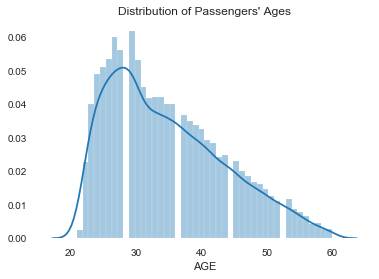

In [83]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

In [84]:
credit1.LIMIT_BAL.describe()

count     24001.000000
mean     128484.646473
std       81682.410028
min       20000.000000
25%       50000.000000
50%      120000.000000
75%      200000.000000
max      300000.000000
Name: LIMIT_BAL, dtype: float64

In [85]:
# Drop missing values for the records
limit = credit1['LIMIT_BAL'].dropna()

Text(0.5, 1.0, "Distribution of Credit Limit' Customers")

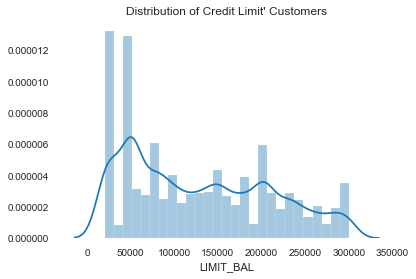

In [86]:
# Distribution of Credit Limit, with an overlay of a density plot
limit_dist = sns.distplot(limit)
limit_dist.set_title("Distribution of Credit Limit' Customers")

In [87]:
credit1.LIMIT_BAL.describe()

count     24001.000000
mean     128484.646473
std       81682.410028
min       20000.000000
25%       50000.000000
50%      120000.000000
75%      200000.000000
max      300000.000000
Name: LIMIT_BAL, dtype: float64

In [94]:
x = credit1['MARRIAGE']
y = credit1['AGE']

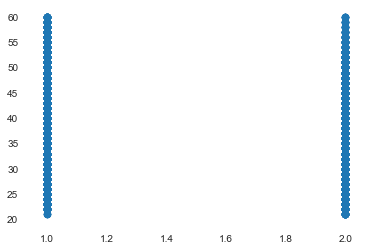

In [95]:
plt.scatter(x,y)
plt.show()

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [99]:
X_train = credit1.loc[:, credit1.columns != 'LIMIT_BAL']
y_train = credit1.iloc[:, 0]

In [105]:
from sklearn import preprocessing
    y = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5)

In [107]:
grd = GradientBoostingClassifier(n_estimators=100)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train)[:, :, 0]), y_train)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

ValueError: multiclass format is not supported